In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
import seaborn as sns
import os
import math
import cv2
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import json
from PIL import Image

In [ ]:
from platform import python_version

print(python_version())

3.9.16


In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified')

In [ ]:
!ls

accuracyplot.png	   CM.png    images	   test       yolov5_Code.ipynb
bounding_box.ipynb	   data.csv  lossplot.png  VIT.ipynb
classification_report.png  Dataset   TB		   yolov5


In [ ]:
master=pd.read_csv('data.csv')

In [ ]:
master.head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,h0001.png,512,512,train,none,no_tb,none,healthy
1,h0003.png,512,512,train,none,no_tb,none,healthy
2,h0005.png,512,512,train,none,no_tb,none,healthy
3,h0008.png,512,512,train,none,no_tb,none,healthy
4,h0009.png,512,512,train,none,no_tb,none,healthy


In [ ]:
master['image_type'].value_counts()

healthy           3800
sick_but_no_tb    3800
tb                1211
Name: image_type, dtype: int64

In [ ]:
len(master)

8811

In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified/Dataset')

In [ ]:
try:
  os.mkdir('SICK')
except:
  pass

In [ ]:
try:
  os.mkdir('HEALTHY')
except:
  pass

In [ ]:
for i,row in master.iterrows():
  if row['image_type']=='tb':
    continue
  elif row['image_type']=='healthy':
    img_path=os.path.join("images",row['fname'])
    im = cv2.imread(img_path)
    im=cv2.resize(im,(256,256))
    img=row['fname']
    cv2.imwrite(f'HEALTHY/{img}',im)
    # print(im.shape)
  else:
    img_path=os.path.join("images",row['fname'])
    im = cv2.imread(img_path)
    im=cv2.resize(im,(256,256))
    img=row['fname']
    cv2.imwrite(f'SICK/{img}',im)
    # print(im.shape)
  print(i)

Streaming output truncated to the last 5000 lines.
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789

In [ ]:
master[master['image_type']=='tb'].head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
7600,tb0005.png,512,512,train,"{'xmin': 381.8337097167969, 'ymin': 126.873390...",tb,active_tb,tb
7601,tb0007.png,512,512,train,"{'xmin': 307.3073425292969, 'ymin': 62.0504455...",tb,latent_tb,tb
7602,tb0007.png,512,512,train,"{'xmin': 144.12008666992188, 'ymin': 52.934719...",tb,latent_tb,tb
7603,tb0012.png,512,512,train,"{'xmin': 307.4519348144531, 'ymin': 81.3111114...",tb,active_tb,tb
7604,tb0017.png,512,512,train,"{'xmin': 138.1031036376953, 'ymin': 119.276954...",tb,latent_tb,tb


In [ ]:
path='/content/drive/MyDrive/tbx11k-simplified/Dataset'

In [ ]:
TB=master[master['image_type']=='tb']

In [ ]:
TB.head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
7600,tb0005.png,512,512,train,"{'xmin': 381.8337097167969, 'ymin': 126.873390...",tb,active_tb,tb
7601,tb0007.png,512,512,train,"{'xmin': 307.3073425292969, 'ymin': 62.0504455...",tb,latent_tb,tb
7602,tb0007.png,512,512,train,"{'xmin': 144.12008666992188, 'ymin': 52.934719...",tb,latent_tb,tb
7603,tb0012.png,512,512,train,"{'xmin': 307.4519348144531, 'ymin': 81.3111114...",tb,active_tb,tb
7604,tb0017.png,512,512,train,"{'xmin': 138.1031036376953, 'ymin': 119.276954...",tb,latent_tb,tb


In [ ]:
!pip install chitra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from chitra.image import Chitra


In [ ]:
import ast

In [ ]:
!ls

accuracyplot.png  data.csv  images	  test	     Yolo_data
CM.png		  Dataset   lossplot.png  VIT.ipynb  yolov5


In [21]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified')

In [22]:
try:
  os.mkdir('TB_256')
except:
  pass

val: 190.91685 63.436695 211.03531 85.71958
bbox: 190.91685 63.436695 20.118454 22.282887


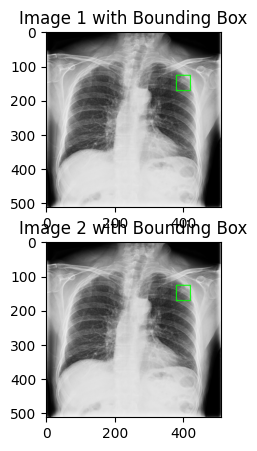

In [23]:
for i,row in TB.iterrows():
  img_path=os.path.join("images",row['fname'])
  im = cv2.imread(img_path)
  bbx=row['bbox']
  input_dict = eval(bbx)
  # print(input_dict)
  x,y,w,h=input_dict['xmin'],input_dict['ymin'],input_dict['width'],input_dict['height']

  # Display the first image with its bounding box
  plt.subplot(2, 1, 1)
  cv2.rectangle(im, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.title('Image 1 with Bounding Box')
  # plt.xticks([]), plt.yticks([])
  # plt.gca().add_patch(plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none'))

  new_img=Chitra(im,[x, y,x+w,y+h],'')
  new_img.resize_image_with_bbox((256,256))

  # print(new_img.shape)
  bbox=new_img.bboxes
  # print(bbox[0])
  x1,y1=bbox[0][0]
  x2,y2=bbox[0][1]
  w=x2-x1
  h=y2-y1
  plt.subplot(2, 1, 2)
  cv2.rectangle(np.asarray(new_img.image), (int(x1), int(y1)), (int(x1+w), int(y1+h)), (0, 255, 0), 2)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.title('Image 2 with Bounding Box')
  # plt.xticks([]), plt.yticks([])
  # plt.gca().add_patch(plt.Rectangle((x1, y1), w, h, linewidth=2, edgecolor='g', facecolor='none'))

  print('val:',x1,y1,x2,y2)
  print('bbox:',x1,y1,w,h)
  Xmin = (x1+w/2)/256
  Ymin = (y1+h/2)/256
  W = w/256
  H = h/256
  lab=row['fname'].split('.')[0]
  img=row['fname']
  new_im=np.asarray(new_img.image)
  # cv2.imwrite(f'TB/{img}',new_im)
  # with open(f'TB/{lab}.txt', 'w') as f:
  #   f.write(str(0))
  #   f.write(' ')
  #   f.write(str(Xmin))
  #   f.write(' ')
  #   f.write(str(Ymin))
  #   f.write(' ')
  #   f.write(str(W))
  #   f.write(' ')
  #   f.write(str(H))
  #   f.close()
  break

In [24]:
for i,row in TB.iterrows():
  img_path=os.path.join("images",row['fname'])
  im = cv2.imread(img_path)
  bbx=row['bbox']
  input_dict = eval(bbx)
  x,y,w,h=input_dict['xmin'],input_dict['ymin'],input_dict['width'],input_dict['height']
  new_img=Chitra(im,[x, y,x+w,y+h],'')
  new_img.resize_image_with_bbox((256,256))
  bbox=new_img.bboxes
  x1,y1=bbox[0][0]
  x2,y2=bbox[0][1]
  w=x2-x1
  h=y2-y1
  Xmin = (x1+w/2)/256
  Ymin = (y1+h/2)/256
  W = w/256
  H = h/256
  lab=row['fname'].split('.')[0]
  img=row['fname']
  new_im=np.asarray(new_img.image)
  cv2.imwrite(f'TB_256/{img}',new_im)
  with open(f'TB_256/{lab}.txt', 'w') as f:
    f.write(str(0))
    f.write(' ')
    f.write(str(Xmin))
    f.write(' ')
    f.write(str(Ymin))
    f.write(' ')
    f.write(str(W))
    f.write(' ')
    f.write(str(H))
    f.close()